In [1]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

In [47]:
#Реализуем цикл градиентного спуска
class LogisticRegressionGD(object):
    def __init__(self):
        self.a = np.zeros(2).reshape(1, 2)
        
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x @ self.a))
    
    def predict(self, x):
        return self.sigmoid(x)
    
    def coefs(self):
        return self.a
    
    def LogLikelihood(self, x, Y):
        n = len(Y)
        # loss = -(1/n) * np.sum(Y * np.log(self.predict(x)) + (1 - Y) * np.log(1 - self.predict(x) + 1e-7))
        loss = -np.mean(Y * np.log(self.predict(x) + 1e-7) + (1 - Y + 1e-7) * np.log(1 - self.predict(x) + 1e-7))
        return loss
    
    def CrossEntropy(self, x, Y):
        # return (-Y*np.log(self.predict(x)) - (1- Y)*np.log(1 - self.predict(x) + 1e-7)).sum()
        return (-Y*np.log(self.predict(x) + 1e-7) - (1 - Y)*np.log(1 - self.predict(x) + 1e-7)).sum()

    def accuracy(self, x, Y):
        Y_Pred = self.predict(x)
        
        Y_Pred[Y_Pred > 0.5] = 1
        Y_Pred[Y_Pred <= 0.5] = 0
        
        all_pred = len(Y)

        correct_pred = 0
        for value1, value2 in zip(Y, Y_Pred):
            if value1 == value2:
                correct_pred += 1
            
        return correct_pred / all_pred 
    
    def f1score(self, x, Y):
        Y_Pred = self.predict(x)
        
        Y_Pred[Y_Pred > 0.5] = 1
        Y_Pred[Y_Pred <= 0.5] = 0
        
        tp = np.sum(Y*Y_Pred)
        tn = np.sum((1-Y)*(1-Y_Pred))
        fp = np.sum((1-Y)*Y_Pred)
        fn = np.sum(Y*(1-Y_Pred))

        p = tp / (tp + fp)
        r = tp / (tp + fn)

        f1 = 2*p*r / (p+r)
        
        return f1
    
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000, Rtype = "LL"):
        self.a = np.zeros (x.shape[1]).reshape(x.shape[1],1)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            if Rtype == "LL":
                new_error = self.LogLikelihood(x, Y)
                dT_a = np.mean((x.T@(Y - self.predict(x))), axis=1)
                dT_a = dT_a.reshape(-1, 1)
                self.a += alpha*dT_a
            elif Rtype == "CE":
                new_error = self.CrossEntropy(x, Y)
                #display(new_error)
                dT_a = -x.T @(Y - self.predict(x))
                self.a -= alpha*dT_a
                
            step += 1
            steps.append(step)
            errors.append(new_error)

        return steps, errors

In [48]:
insclass = pd.read_csv(r"insclass_train.csv", delimiter=",").fillna(0)
insclass.head()

Y = insclass['target']
x = insclass.drop('target', axis = 1)

# x = pd.concat([x, pd.get_dummies(x['variable_1'], drop_first=True),
#                pd.get_dummies(x['variable_5'], drop_first=True),
#                pd.get_dummies(x['variable_20'], drop_first=True),
#                pd.get_dummies(x['variable_21'], drop_first=True),
#                pd.get_dummies(x['variable_22'], drop_first=True),
#                pd.get_dummies(x['variable_28'], drop_first=True)], axis = 1)

x = x.drop(['variable_1', 'variable_5', 'variable_20', 'variable_21', 'variable_22', 'variable_28'], axis = 1)

In [49]:
# x.dtypes

In [50]:
# x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

Реализовать класс модели логистической регрессии с использованием:
а) максимизации логарифмического правдоподобия методом градиентного подъема
б) минимизации функции потерь (кросс-энтропии) методом градиентного спуска

Сравнить результаты (время исполнения и достигнутые значения accuracy и f1) в случаях а и б при одном и том же числе шагов и скорости обучения.



In [51]:
# x_ = x.copy()
import time

intercept = np.ones((x.shape[0], 1))
x_ = np.array(pd.DataFrame(np.concatenate((intercept, x), axis = 1)))
x_.shape

(151406, 23)

In [52]:
Y = np.array(Y, dtype="float32")
x_ = np.array(x_, dtype="float32")
Y = Y.reshape(-1, 1)

## Loglikeklihood

In [53]:
start_time = time.time()
regr = LogisticRegressionGD()
steps, errors =  regr.fit(x_, Y, alpha = 1e-10, epsylon = 0.01, max_steps = 10000, Rtype = "LL") 

display('Время обучения: ', time.time() - start_time, 'сек.')

C:\Users\denis\AppData\Local\Temp\ipykernel_2968\3624431500.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x @ self.a))


'Время обучения: '

753.9616281986237

'сек.'

C:\Users\denis\AppData\Local\Temp\ipykernel_2968\3624431500.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x @ self.a))


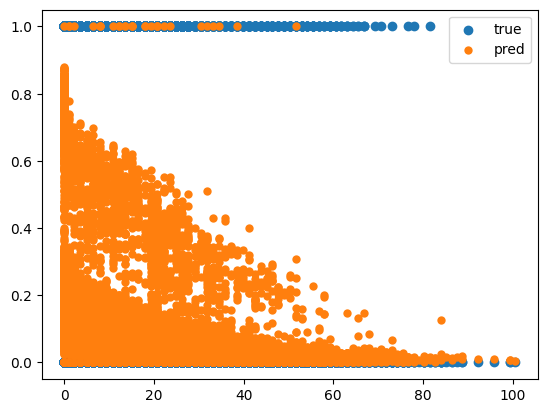

In [54]:
Y_Pred = regr.predict(x_)

plt.scatter(x_[:, -1], Y, label="true")
plt.scatter(x_[:, -1], Y_Pred, label="pred", linewidth=1e-20)
plt.legend()


In [55]:
# Вычислим метрики
print("Accuracy:", regr.accuracy(x_, Y))
print("F1 Score:", regr.f1score(x_, Y))

C:\Users\denis\AppData\Local\Temp\ipykernel_2968\3624431500.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x @ self.a))


Accuracy: 0.9123878842318006
F1 Score: 0.1929792541217984


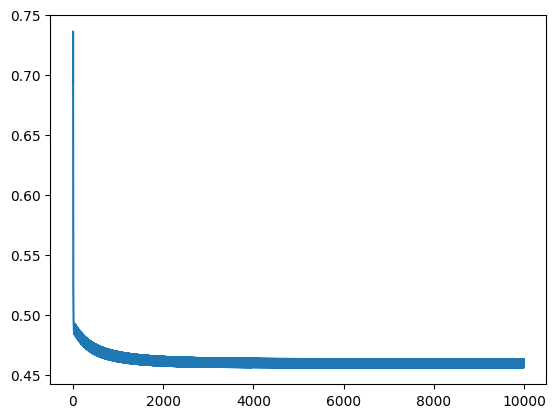

In [56]:
# График изменения значения ошибки в процессе тренировки
plt.plot(steps, errors)

## Cross entropy

In [57]:
start_time = time.time()
regr = LogisticRegressionGD()
steps, errors =  regr.fit(x_, Y, alpha = 1e-10, epsylon = 0.01, max_steps = 10000, Rtype = "CE") 

display('Время обучения: ', time.time() - start_time, 'сек.')

C:\Users\denis\AppData\Local\Temp\ipykernel_2968\3624431500.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x @ self.a))


'Время обучения: '

790.6133117675781

'сек.'

C:\Users\denis\AppData\Local\Temp\ipykernel_2968\3624431500.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x @ self.a))


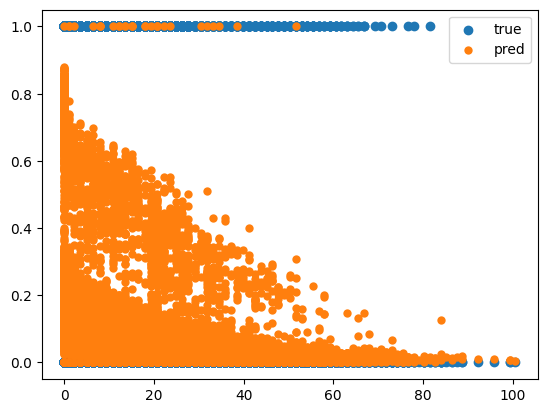

In [58]:
Y_Pred = regr.predict(x_)

plt.scatter(x_[:, -1], Y, label="true")
plt.scatter(x_[:, -1], Y_Pred, label="pred", linewidth=1e-20)
plt.legend()

In [59]:
# Вычислим метрики
print("Accuracy:", regr.accuracy(x_, Y))
print("F1 Score:", regr.f1score(x_, Y))

C:\Users\denis\AppData\Local\Temp\ipykernel_2968\3624431500.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x @ self.a))


Accuracy: 0.9123878842318006
F1 Score: 0.1929792541217984


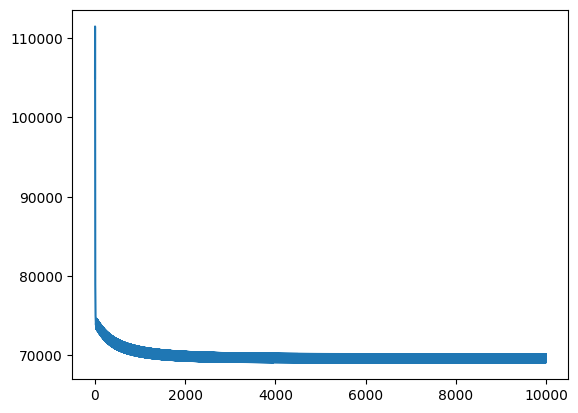

In [60]:
# График изменения значения ошибки в процессе тренировки
plt.plot(steps, errors)

Реализовать расчеты способами а и б для набора данных из файла insclass_train.csv/
Для 151 406 договоров страхования транспортных средств известны значения ряда признаков, в том числе пол, возраст, стаж вождения и коэффициент бонус-малус водителя, тип, марка, модель, год выпуска, страна – производитель, мощность и объем двигателя, а также признак target, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае (файл insclass_train.csv).

Требуется построить модель, предсказывающую значение признака target для 22 624 договоров из тестового набора данных (файл insclass_test.csv).

В обучающем наборе данных для каждого договора известны следующие поля:

variable_1 - агрегированный коэффициент бонус-малус (повышающий или понижающий стоимость полиса в зависимости от аварийности в предыдущие периоды);
variable_2 - индикатор расторжения договора по инициативе страхователя (клиента);
variable_3 - индикатор расторжения договора по инициативе страховщика (страховой компании);
variable_4 - идентификатор года выпуска транспортного средства;
variable_5 - идентификатор страны - производителя транспортного средства;
variable_6 - мощность двигателя в лошадиных силах;
variable_7 - объем двигателя в куб. см;
variable_8 - идентификатор стороны расположения руля (левый или правый);
variable_9 - пробег транспортного средства, покрываемый гарантией производителя;
variable_10 - индикатор действия гарантии на транспортное средство;
variable_11 - "мультидрайв" - индикатор допуска к управлению транспортным средством более одного водителя;
variable_12 - возраст транспортного средства (в мес.);
variable_13 - возраст водителя с максимальным стажем;
variable_14 - коэффициент возраст-стаж;
variable_15 - коэффициент краткосрочности;
variable_16 - коэффициент мощности;
variable_17 - коэффициент "мультидрайв";
variable_18 - территориальный коэффициент;
variable_19 - коэффициент "КНДР";
variable_20 - идентификатор канала продаж;
variable_21 - марка транспортного средства;
variable_22 - модель транспортного средства;
variable_23 - индикатор отечественных транспортных средств;
variable_24 - пол водителя с максимальным коэффициентом "возраст-стаж";
variable_25 - индикатор пролонгации;
variable_26 - индикатор совпадения собственника транспортного средства и водителя;
variable_27 - стаж водителя с максимальным коэффициентом "возраст-стаж";
variable_28 - тип транспортного средства;
target - класс риска, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае.

## Это не смотри

In [61]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        '''Initialize variables
        Args:
            learning_rate  : Learning Rate
            max_iterations : Max iterations for training weights
        '''
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.likelihoods    = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7

    def sigmoid(self, z):
        '''Sigmoid function: f:R->(0,1)
        Args:
            z : A numpy array (num_samples,)
        Returns:
            A numpy array where sigmoid function applied to every element
        '''
        ### START CODE HERE
        sig_z = (1/(1+np.exp(-z)))
        ### END CODE HERE
        
        assert (z.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z
    
    def log_likelihood(self, y_true, y_pred):
        '''Calculates maximum likelihood estimate
        Remember: y * log(yh) + (1-y) * log(1-yh)
        Note: Likelihood is defined for multiple classes as well, but for this dataset
        we only need to worry about binary/bernoulli likelihood function
        Args:
            y_true : Numpy array of actual truth values (num_samples,)
            y_pred : Numpy array of predicted values (num_samples,)
        Returns:
            Log-likelihood, scalar value
        '''
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))
        
        ### START CODE HERE
        likelihood = (y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
    
        ### END CODE HERE
        
        return np.mean(likelihood)
    
    def fit(self, X, y):
        '''Trains logistic regression model using gradient ascent
        to gain maximum likelihood on the training data
        Args:
            X : Numpy array (num_examples, num_features)
            y : Numpy array (num_examples, )
        Returns: VOID
        '''
        
        num_examples = X.shape[0]
        num_features = X.shape[1]
        
        ### START CODE HERE
        
        # Initialize weights with appropriate shape
        self.weights = np.zeros((X.shape[1]))
        # print("Z",self.weights.shape)
        # print(X.shape)
        
        
        # Perform gradient ascent
        for i in range(self.max_iterations):
            # Define the linear hypothesis(z) first
            # HINT: what is our hypothesis function in linear regression, remember?
            
            z  = np.dot(X,self.weights)
          
            # Output probability value by appplying sigmoid on z
            y_pred = self.sigmoid(z)
            
            
            
            # Calculate the gradient values
            # This is just vectorized efficient way of implementing gradient. Don't worry, we will discuss it later.
            gradient = np.mean((y-y_pred)*X.T, axis=1)
            
            # Update the weights
            # Caution: It is gradient ASCENT not descent
            self.weights +=  self.learning_rate*gradient
            
            # Calculating log likelihood
            likelihood = self.log_likelihood(y,y_pred)

            self.likelihoods.append(likelihood)
    
        ### END CODE HERE
    
    def predict_proba(self,X):
        '''Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        Args:
            X : Numpy array (num_samples, num_features)
        Returns:
            probabilities: Numpy array (num_samples,)
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")
      
        ### START CODE HERE
               
        z = np.dot(X,self.weights)
        probabilities = self.sigmoid(z)
        # probabilities.reshape(probabilities.shape[0],1)
        
        ### END CODE HERE
        
        return probabilities
    
    def predict(self, X, threshold=0.5):
        '''Predict/Classify X in classes
        Args:
            X         : Numpy array (num_samples, num_features)
            threshold : scalar value above which prediction is 1 else 0
        Returns:
            binary_predictions : Numpy array (num_samples,)
        '''
        # Thresholding probability to predict binary values
        
        binary_predictions = np.array(list(map(lambda x: 1 if x>threshold else 0, self.predict_proba(X))))
        
        return binary_predictions